## k−NN を使った手書き文字認識

### MNIST Data のダウンロード

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

In [15]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [66]:
X, y = shuffle(mnist.data, mnist.target)
X = X / 255.0
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, dev_X , train_y, dev_y = train_test_split(train_X, train_y, test_size=0.2)

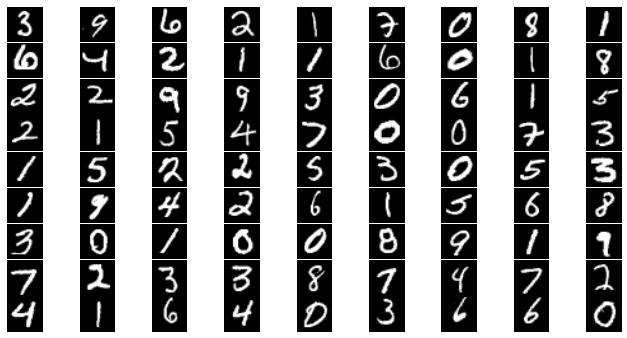

In [32]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28,28)), cmap='gray')

### Cosine 類似度

In [37]:
norm = numpy.linalg.norm(train_X, ord=2, axis=1)
normalized_train_X = train_X / norm[:,numpy.newaxis]

In [38]:
sample_1 = normalized_train_X[0]
sample_2 = normalized_train_X[1]
print numpy.dot(sample_1, sample_2)

0.392971963306


### k-NN でテストデータに対する予測